# Fahrspurerkennung

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## 1. Gelb → Weiß (kann man sich sparen)

(319, 1280, 3)
(319, 1280)
(319, 1280, 3)


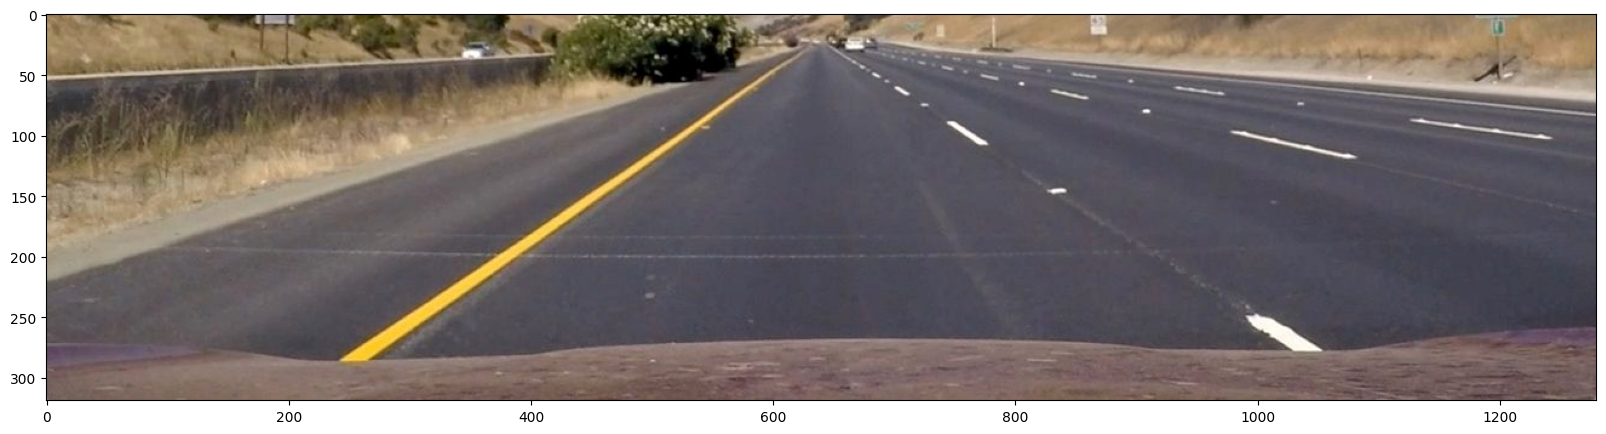

In [31]:
img = cv.imread("images/image001.jpg", cv.IMREAD_COLOR)
img = img[400:-1]
img = cv.cvtColor(img, cv.COLOR_BGR2HSV)
yellow_low = (20, 75 , 75)
yellow_high = (40, 255, 255)
print(img.shape)
img_yellow = cv.inRange(img, yellow_low, yellow_high)
print(img_yellow.shape)
img_f = img.copy()
# img_f[np.where(img_yellow > 0)] = (0, 0, 180)
img_f = cv.cvtColor(img_f, cv.COLOR_HSV2RGB)
print(img_f.shape)

plt.figure(figsize=(20,10))
plt.imshow(img_f)
plt.show()

## 2. Grauwertbild

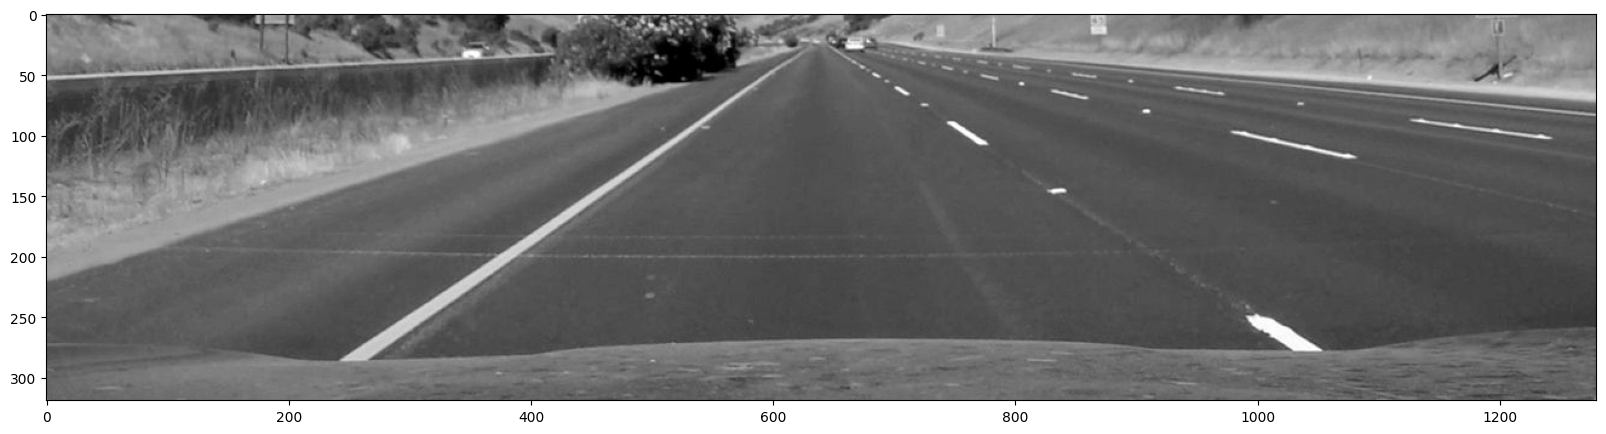

In [32]:
img_gray = cv.cvtColor(img_f, cv.COLOR_RGB2GRAY)

plt.figure(figsize=(20,10))
plt.imshow(img_gray, cmap='gray')
plt.show()

## 3. Kantenerkennung mit canny edge

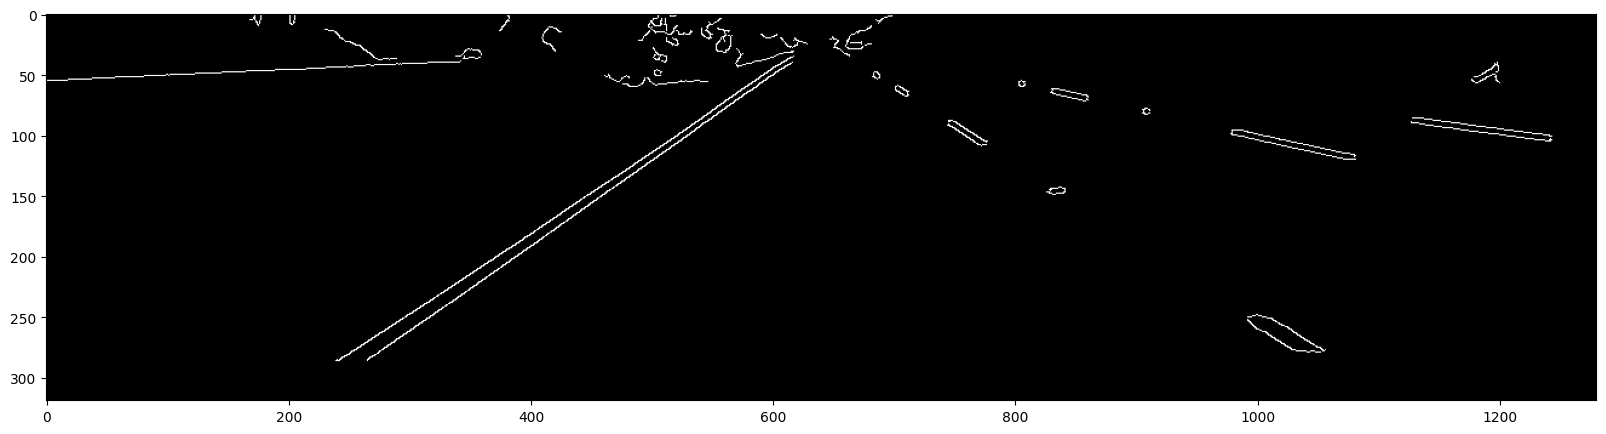

In [34]:
img_blurred = cv.GaussianBlur(img_gray, (5,5), cv.BORDER_DEFAULT)

img_canny = cv.Canny(img_blurred, 100, 200)

plt.figure(figsize=(20,10))
plt.imshow(img_canny, cmap='gray')
plt.show()

## 4. Hough-Transformation

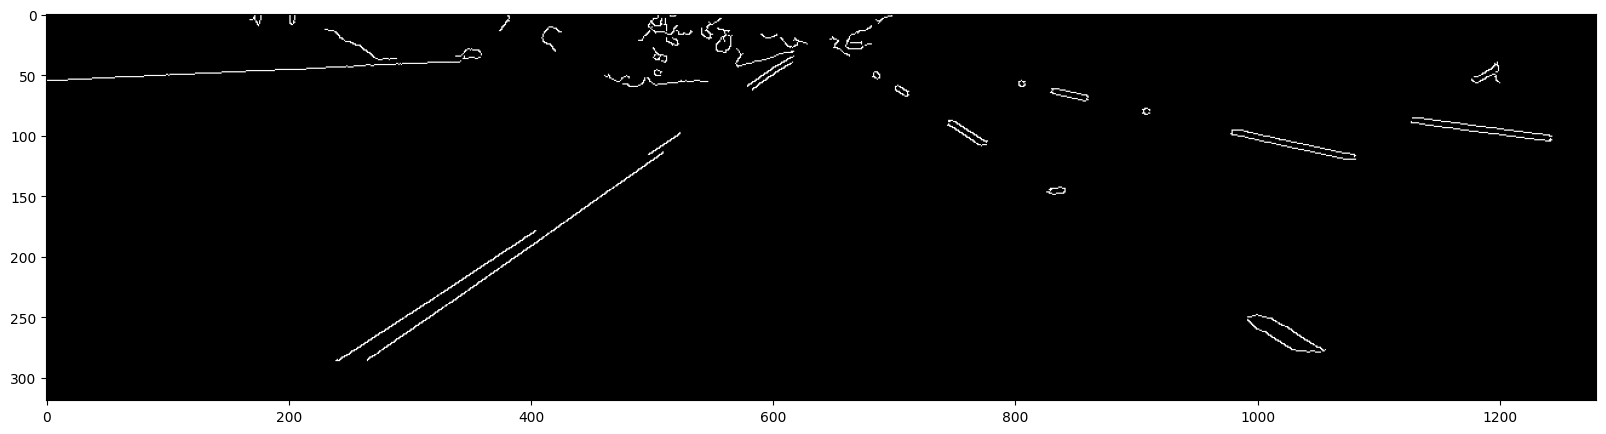

In [59]:
lines = cv.HoughLinesP(img_canny, rho=6, theta=np.pi/80, threshold=100, minLineLength=50, maxLineGap=0)
img_hough = img_canny.copy()

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv.line(img_hough, (x1, y1), (x2, y2), (0, 255, 0), 2)


plt.figure(figsize=(20,10))
plt.imshow(img_hough, cmap='gray')
plt.show()